# **Prerequisites**
Before we start the coding part, make sure that you have set up your Python 3 environment and required packages. If you don’t have an environment set up yet, you can follow the steps in this [tutorial](https://www.relataly.com/anaconda-python-environment-machine-learning/1663/) to set up the Anaconda environment or you can use Google Colab Tools. We will be using Keras (2.0 or higher) with Tensorflow backend, the machine learning library sci-kit-learn.

Diagram flow Stock Price Prediction:
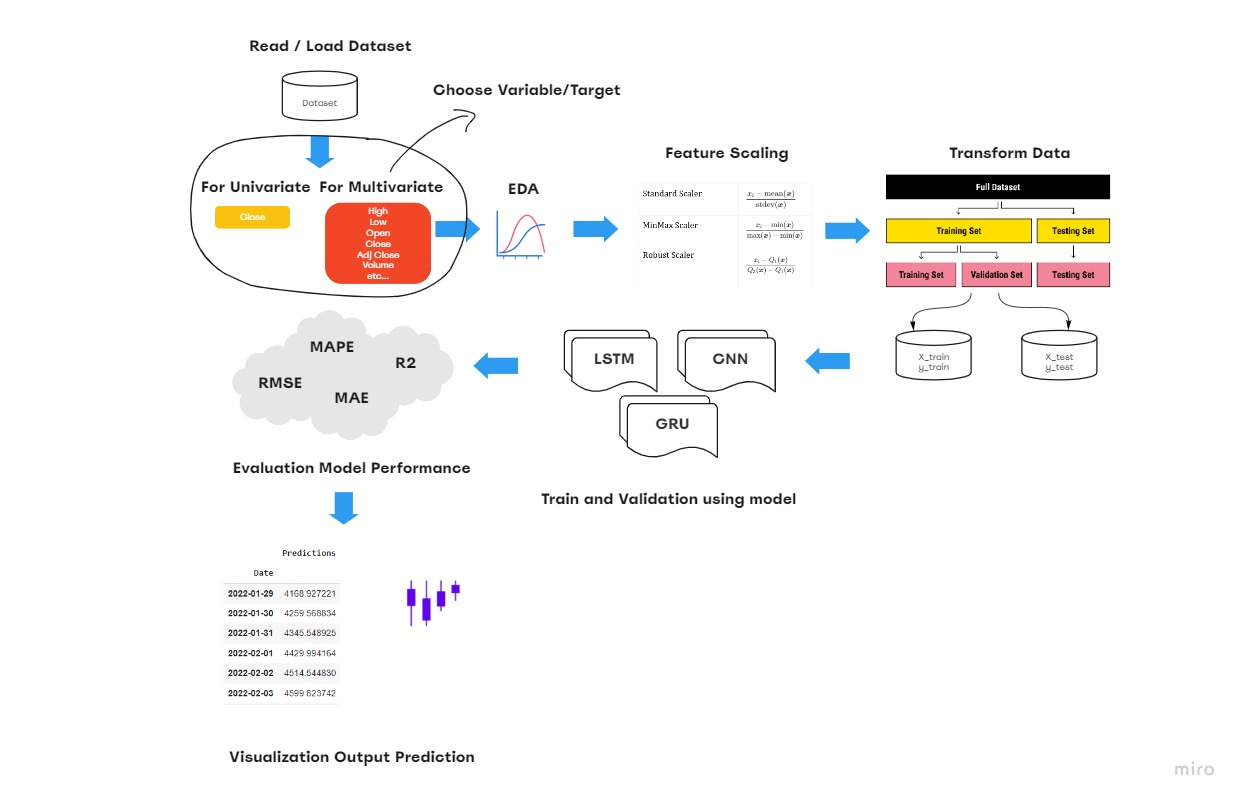

# **Section #1 Univariate Multistep LSTM**
# **Step #1 Import required Library/Packaged**

**Package/Library commonly used**

*   import pandas as pd = Additional functions for analysing and manipulating data
*   import random = It can be used to perform some random action like to get a random number
*   import time = Time Functions
*   import math = Mathematical functions 
*   import numpy as np = Fundamental package for scientific computing with Python
*   import os = Module in Python provides functions for interacting with the operating system
*   import datetime = Date Functions
*   from datetime import timedelta = Date Functions

<br>

**Package/Library for Model**

*   import tensorflow as tf = Package for Deep learning
*   from tensorflow.keras.models import * = Deep learning library, used for neural networks
*   from tensorflow.keras.layers import * = Deep learning classes for recurrent and regular densely-connected layers
*   from tensorflow.keras.callbacks import * = Deep learning callbacks function during model training

<br>

**Package/Library for Visualization Data**

*   import matplotlib.pyplot as plt 
*   import plotly.graph_objects as go  
*   import plotly.express as px 

<br>

**Package/Library for preprocessing and evaluation**

*   from sklearn import preprocessing = Package for preprocessing data
*   from sklearn.model_selection import train_test_split = Packages for split the data into two parts, training and testing
*   from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score = Packages for measuring model performance / errors
*   from math import sqrt = Built-in math library function in Python that returns the square root

In [ ]:
import pandas as pd
import random
import time
import math
import numpy as np
import os
import datetime as dt
from datetime import timedelta
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
print('Tensorflow version: {}'.format(tf.__version__))

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

Tensorflow version: 2.7.0


# **Step #2 Load the Time Series Data**

To download the data, we can get from this [link](https://finance.yahoo.com/)

In [ ]:
# Create variable to read dataset in various format (csv, xlsx, txt, etc)
stock_market_df = pd.read_csv('UNVR.JK.csv')
stock_market_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-09-03,615.0,675.0,605.0,675.0,383.379333,43162500
1,2003-09-04,690.0,750.0,675.0,685.0,389.059174,82850000
2,2003-09-05,685.0,700.0,680.0,690.0,391.898895,24055000
3,2003-09-08,690.0,690.0,665.0,680.0,386.219330,18007500
4,2003-09-09,680.0,680.0,660.0,665.0,377.699646,14075000
...,...,...,...,...,...,...,...
4578,2022-01-24,4130.0,4140.0,4080.0,4080.0,4080.000000,9762900
4579,2022-01-25,4100.0,4110.0,4010.0,4060.0,4060.000000,17157500
4580,2022-01-26,4060.0,4130.0,4050.0,4130.0,4130.000000,11479200
4581,2022-01-27,4120.0,4120.0,4050.0,4060.0,4060.000000,6277700


# **Step #3 Explore the Data**

Let’s first familiarize ourselves with the data before taking further steps. When dealing with time-series data, line plots are the best choice to gain an initial understanding of our data.

In [ ]:
fig_OLHCA = px.line(stock_market_df, x="Date", y="Close", width=1130, height=400)
fig_OLHCA.add_scatter(x=stock_market_df['Date'], y=stock_market_df['Low'], mode='lines',name='Low')
fig_OLHCA.add_scatter(x=stock_market_df['Date'], y=stock_market_df['Close'], mode='lines',name='Close')
fig_OLHCA.add_scatter(x=stock_market_df['Date'], y=stock_market_df['Adj Close'], mode='lines',name='Adj close')
fig_OLHCA.add_scatter(x=stock_market_df['Date'], y=stock_market_df['High'], mode='lines',name='High')
fig_OLHCA.add_scatter(x=stock_market_df['Date'], y=stock_market_df['Open'], mode='lines',name='Open')
fig_OLHCA.update_layout( font_color="black", title_font_family="Times New Roman",
                         title_font_color="black", showlegend=True,
                         title={'text': "PT Unilever Indonesia Tbk Stock Price",'y':0.94,'x':0.5,'xanchor': 'center','yanchor': 'top'},
                         legend=dict(yanchor="top",y=0.99,xanchor="left",x=0.01))
fig_OLHCA.update_xaxes(title_text='Date')
fig_OLHCA.update_yaxes(title_text='Stock Price')
fig_OLHCA.show()

fig_volume = px.line(stock_market_df, x=stock_market_df['Date'], y="Volume", width=1130, height=400, title="PT Unilever Indonesia Tbk Stock Volume")
fig_volume.update_xaxes(title_text='Date')
fig_volume.update_yaxes(title_text='Stock Price')
fig_volume.show()

In [ ]:
# Convert Date column to datetime form
stock_market_df['Date'] = pd.to_datetime(stock_market_df['Date'])
# Set Date column as index
stock_market_df = stock_market_df.set_index(stock_market_df['Date'])
# Delete the initial Date column because Date has been used as an index, besides that, drop the Open, High, Low, Adj Close, and Volume columns
# Because it will only use the Close column
stock_market_df.drop(columns=['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)
# Delete columns that have NaNs values ​​or are empty
stock_market_df.dropna(inplace=True) 
stock_market_df

,Close
Date,
2003-09-03,675.0
2003-09-04,685.0
2003-09-05,690.0
2003-09-08,680.0
2003-09-09,665.0
...,...
2022-01-24,4080.0
2022-01-25,4060.0
2022-01-26,4130.0


# **Step #4 Scaling**

When working with neural networks, a best practice is to scale the data. By scaling the data, it is often possible to increase training times and improve model accuracy.

**Standar Scaler**

Changing such that it has a meaning of 0 and the standard deviation as 1. In short, it standardizes the data. Standardization is useful for data that has a negative value. It organizes the data in a standard normal distribution. This is more useful in classification than regression.

**Normalization (Min Max Scaler)**

It squeezes the data between 0 and 1. It does normalization. As the range and magnitude decrease, the gradient in the training process doesn't explode and you don't get a higher loss value.

**Robust Scaler**

RobustScaler is based on percentiles and are therefore not influenced by a few number of very large marginal outliers. Consequently, the resulting range of the transformed feature values is larger than for the previous scalers and, more importantly, are approximately similar: for both features most of the transformed values lie in a [-2, 3] range. 

the formula for the above types of scaling features :

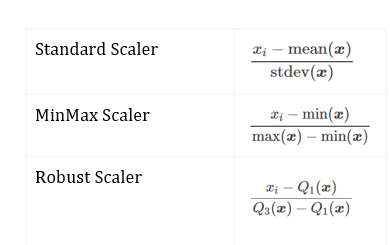

In [ ]:
# Convert dataframe to numpy array
dataset = stock_market_df.values

# Create a separate scaler that works on a single column for predictive scaling with a range between 0 and 1
scaler_pred = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_data = scaler_pred.fit_transform(dataset)
print(scaled_data)

[[0.00520833]
 [0.0061553 ]
 [0.00662879]
 ...
 [0.33238636]
 [0.32575758]
 [0.32481061]]


# **Step #5 Transforming the Data**

An essential step in time series prediction is to slice the data into multiple input data sequences with associated target values. For this process, we use a sliding windows algorithm. This algorithm moves a window step by step through the time series data, adding a sequence of data points to the input data with each step. In addition, the algorithm stores the target value (e.g., Closing Price) following this sequence in a separate target data set. Then the algorithm pushes the window one step further and repeats these activities. In this way, the algorithm creates a data set with many input sequences (mini-batches), each of which has a corresponding target value in the target record. This process applies both to the creation of the training and the test data.

We will apply the sliding window approach to our data. The result is a training set (x_train) that contains 3607 input sequences, and each has 60 time-steps and one features. The corresponding target dataset (y_train) contains 3607 target values.



In [ ]:
# np.random.seed(7)
# tf.random.set_seed(7)
# random.seed(7)

# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 60

# Split training data into training data sets and train
# As a first step, get the number of rows to train the model on 80% data
train_data_length = math.ceil( len(dataset) * 0.8 )

# Create training and test data
train_data = scaled_data[0:train_data_length, :]
test_data = scaled_data[train_data_length - sequence_length:, :]

def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) # Contains sequence_length values 0-sequence_length * columns
        y.append(data[i, 0]) # Contains the prediction values for validation (3rd column = Close),  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

# Reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

(3607, 60, 1)
(916, 60, 1)


# **Step #6A Train the Univariate Prediction Model**

After we have prepared the data, we can train the LSTM for stock market prediction. The architecture of our neural network consists of the following four layers:

*   LSTM layer, which takes our mini-batches as input and returns the whole sequence
*   LSTM layer that takes the sequence from the previous layer, but only return 1 values
*   Dense layer with 25 neurons
*   Final dense layer that outputs the predicted value

The number of neurons in the first layer must be equal to the size of a minibatch of the input data. Each minibatch in our dataset consists of a matrix with 60 steps and one features. Thus, the input layer of our recurrent neural network consists of 60 neurons.

In [ ]:
# Configure the neural network model
LSTM_model = Sequential()

# The number of neurons is determined from the result of x_train.shape[1] multiplied by x_train.shape[2] which means 60 * 1 = 60
N_neurons = x_train.shape[1] * x_train.shape[2]
print(N_neurons, x_train.shape[1], x_train.shape[2])
LSTM_model.add(LSTM(N_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
LSTM_model.add(LSTM(N_neurons, return_sequences=False))
LSTM_model.add(Dense(25))
LSTM_model.add(Dense(1))

# Compile model using loss mse, optimizer adam
# For the optimizer, if you want to use another optimizer option, you can use rmsprop or sgd
LSTM_model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae"])
# Summarize the architecture of the model that has been created
LSTM_model.summary()

60 60 1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 lstm_1 (LSTM)               (None, 60)                29040     
                                                                 
 dense (Dense)               (None, 25)                1525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 45,471
Trainable params: 45,471
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model
epochs = 50
batch_size = 16
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='LSTM-Stock-Market.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
history = LSTM_model.fit(x_train, y_train, callbacks=[es, mcp], validation_split=0.2, batch_size=batch_size, epochs=epochs)

Epoch 1/50
180/181 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0168
Epoch 00001: val_loss improved from inf to 0.00087, saving model to LSTM-Stock-Market.h5
181/181 [==============================] - 18s 65ms/step - loss: 0.0011 - mae: 0.0168 - val_loss: 8.7499e-04 - val_mae: 0.0242
Epoch 2/50
180/181 [============================>.] - ETA: 0s - loss: 2.0704e-04 - mae: 0.0090
Epoch 00002: val_loss improved from 0.00087 to 0.00062, saving model to LSTM-Stock-Market.h5
181/181 [==============================] - 11s 59ms/step - loss: 2.0681e-04 - mae: 0.0090 - val_loss: 6.1800e-04 - val_mae: 0.0195
Epoch 3/50
180/181 [============================>.] - ETA: 0s - loss: 2.1830e-04 - mae: 0.0095
Epoch 00003: val_loss improved from 0.00062 to 0.00061, saving model to LSTM-Stock-Market.h5
181/181 [==============================] - 11s 59ms/step - loss: 2.1814e-04 - mae: 0.0095 - val_loss: 6.1279e-04 - val_mae: 0.0198
Epoch 4/50
181/181 [==============================] - E

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


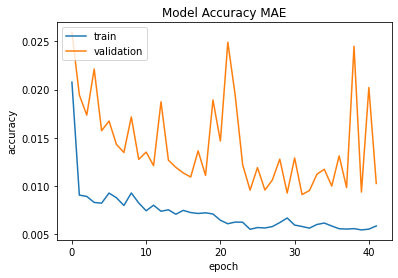

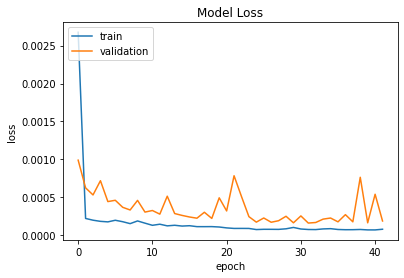

In [ ]:
# List all data in history model
print(history.history.keys())
# Summarize history for MAE accuracy values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Accuracy MAE')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Summarize history for Loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **Step #7A Evaluate Model Performance**

Now that we have trained our model, it is time to look at its performance. But, first, we have to reverse the scaling for the predictions. We will calculate three error metrics, MAE, MAPE, RMSE, and R2 Score. Then we will compare the predictions in a line plot with the actual values.

In [ ]:
# Print evaluation metrics for all data sets
train_eval = LSTM_model.evaluate(x_train, y_train, verbose=0)
test_eval = LSTM_model.evaluate(x_test, y_test, verbose=0)
print(' ')
print('Evaluation metrics')
print('Training Data - Loss: {:.4f}, MAE: {:.4f}'.format(train_eval[0], train_eval[1]))
print('Test Data - Loss: {:.4f}, MAE: {:.4f}'.format(test_eval[0], test_eval[1]))

# Get the predicted values
y_train_pred_scaled = LSTM_model.predict(x_train)
# Unscale the predicted values 
y_train_pred = scaler_pred.inverse_transform(y_train_pred_scaled)
y_train_unscaled = scaler_pred.inverse_transform(y_train.reshape(-1, 1))

# Get the predicted values
y_test_pred_scaled = LSTM_model.predict(x_test)
# Unscale the predicted values 
y_test_pred = scaler_pred.inverse_transform(y_test_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Percentage Error (MAPE)
TRAIN_MAPE = np.mean((np.abs(np.subtract(y_train_unscaled, y_train_pred)/ y_train_unscaled))) * 100
print(f'TRAIN Mean Absolute Percentage Error (MAPE): {np.round(TRAIN_MAPE, 2)} %')
TEST_MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_test_pred)/ y_test_unscaled))) * 100
print(f'TEST Mean Absolute Percentage Error (MAPE): {np.round(TEST_MAPE, 2)} %')

# Root Mean Square Error (RMSE)
TRAIN_RMSE = np.sqrt( np.mean(y_train_pred - y_train_unscaled)**2 )
print(f'TRAIN Root Mean Square Error (RMSE): {np.round(TRAIN_RMSE, 2)}')
TEST_RMSE = np.sqrt( np.mean(y_test_pred - y_test_unscaled)**2 )
print(f'TEST Root Mean Square Error (RMSE): {np.round(TEST_RMSE, 2)}')

# R2 Score
r2_acc = r2_score(y_test_unscaled, y_test_pred)
print(f'TEST R2 Score: {np.round(r2_acc, 2)}')

 
Evaluation metrics
Training Data - Loss: 0.0001, MAE: 0.0064
Test Data - Loss: 0.0002, MAE: 0.0097
TRAIN Mean Absolute Percentage Error (MAPE): 2.8 %
TEST Mean Absolute Percentage Error (MAPE): 1.41 %
TRAIN Root Mean Square Error (RMSE): 10.1
TEST Root Mean Square Error (RMSE): 14.39
TEST R2 Score: 0.99


# **Step #8A Predict Future Day’s Price**

After we have trained the neural network, we can forecast the stock market for 20th next day. For this purpose, we use testing data and preprocess it in the same way as we did for model training.

We trained our model with mini-batches of 60 time-steps and one features. Thus, we also need to provide the model with 60-time steps when making the forecast. As before, we transform the data into the shape 20 x 60 x 1, whereby the last figure is the number of feature columns. After generating the forecast, we unscale the stock market predictions back to the original range of values.

In [ ]:
x_future = 60
predictions = np.array([])
last = x_test[-1]
print(last)
for i in range(x_future):
  forecast = LSTM_model.predict(np.array([last]))
  last = np.concatenate([last[1:], forecast])
  predictions = np.concatenate([predictions, forecast[0]])
predictions = scaler_pred.inverse_transform([predictions])[0]
print(predictions)

[[0.36268939]
 [0.36079545]
 [0.36363636]
 [0.36079545]
 [0.35511364]
 [0.38257576]
 [0.37689394]
 [0.36837121]
 [0.37405303]
 [0.36742424]
 [0.3655303 ]
 [0.38257576]
 [0.39962121]
 [0.40340909]
 [0.39962121]
 [0.39772727]
 [0.38731061]
 [0.37973485]
 [0.3655303 ]
 [0.34943182]
 [0.34753788]
 [0.34090909]
 [0.33901515]
 [0.34564394]
 [0.34564394]
 [0.35511364]
 [0.36079545]
 [0.35606061]
 [0.34753788]
 [0.34564394]
 [0.33996212]
 [0.3342803 ]
 [0.33333333]
 [0.32765152]
 [0.32575758]
 [0.32765152]
 [0.33901515]
 [0.33996212]
 [0.33712121]
 [0.33143939]
 [0.33049242]
 [0.34185606]
 [0.34375   ]
 [0.33996212]
 [0.34185606]
 [0.34090909]
 [0.34375   ]
 [0.33712121]
 [0.35132576]
 [0.34564394]
 [0.34090909]
 [0.3342803 ]
 [0.33049242]
 [0.32954545]
 [0.32954545]
 [0.3342803 ]
 [0.32765152]
 [0.32575758]
 [0.33238636]
 [0.32575758]]
[4086.40833855 4098.0212307  4110.41083336 4122.4382019  4134.12662506
 4145.62936783 4157.13840485 4168.79567146 4180.66914558 4192.75819778
 4205.01876831 42

In [ ]:
dicts = []
forecast_date = stock_market_df.index[-1]
for i in range(x_future):
  forecast_date = forecast_date + timedelta(days=1)
  dicts.append({'Predictions':predictions[i], "Date": forecast_date})

future_lstm = pd.DataFrame(dicts).set_index("Date")
future_lstm.to_csv('Result-Predict-LSTM-60Days-After.csv')
future_lstm

,Predictions
Date,
2022-01-29,4086.408339
2022-01-30,4098.021231
2022-01-31,4110.410833
2022-02-01,4122.438202
2022-02-02,4134.126625
2022-02-03,4145.629368
2022-02-04,4157.138405
2022-02-05,4168.795671
2022-02-06,4180.669146


In [ ]:
# Create a graph of predictive results
train = stock_market_df[:train_data_length + 1]
test = stock_market_df[train_data_length:]
test['Predictions'] = y_test_pred

trace1 = go.Scatter(
    x = train.index,
    y = train['Close'],
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = test.index,
    y = test['Predictions'],
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = test.index,
    y = test['Close'],
    mode='lines',
    name = 'Ground Truth'
)
trace4 = go.Scatter(
    x = future_lstm.index,
    y = future_lstm['Predictions'],
    mode='lines',
    name = 'Future Price'
)
layout = go.Layout(
    title = "PT Unilever Indonesia TBK Stock",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)
fig.show()

# **Section #2 Univariate Multistep CNN**
# **Step #6B Train the Univariate Prediction Model**

After previously we have carried out steps 1 to 5, then we can immediately retrain with a different model. We can train the CNN for stock market prediction. The architecture of our neural network consists of the following five layers:

*   Conv1D layer, which takes our mini-batches as input, 
the number of filters is obtained from the results of multiplying the first training data shape with the second training shape data, and number of kernel_size is 2
*   MaxPooling1D with the number of pool_size is 2
*   Flatten Layer
*   Dense layer with 25 neurons
*   Final dense layer that outputs the predicted value

The number of neurons in the first layer must be equal to the size of a minibatch of the input data. Each minibatch in our dataset consists of a matrix with 60 steps and one features. Thus, the input layer of our recurrent neural network consists of 60 neurons.

In [ ]:
# Configure the neural network model
CNN_model = Sequential()

# The number of neurons is determined from the result of x_train.shape[1] multiplied by x_train.shape[2] which means 60 * 1 = 60
N_filter = x_train.shape[1] * x_train.shape[2]
print(N_filter, x_train.shape[1], x_train.shape[2])
CNN_model.add(Conv1D(filters=N_filter, kernel_size=2, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
CNN_model.add(MaxPooling1D(pool_size=2))
CNN_model.add(Flatten())
CNN_model.add(Dense(25))
CNN_model.add(Dense(1))

# Compile model using loss mse, optimizer adam
# For the optimizer, if you want to use another optimizer option, you can use rmsprop or sgd
CNN_model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae"])
# Summarize the architecture of the model that has been created
CNN_model.summary()

60 60 1
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 59, 60)            180       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 29, 60)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1740)              0         
                                                                 
 dense_2 (Dense)             (None, 25)                43525     
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 43,731
Trainable params: 43,731
Non-trainable params: 0
__________________________________________

In [ ]:
# Training the model
epochs = 50
batch_size = 16
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='CNN-Stock-Market.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
history = CNN_model.fit(x_train, y_train, callbacks=[es, mcp], validation_split=0.2, batch_size=batch_size, epochs=epochs)

Epoch 1/50
171/181 [===========================>..] - ETA: 0s - loss: 0.0035 - mae: 0.0270
Epoch 00001: val_loss improved from inf to 0.00255, saving model to CNN-Stock-Market.h5
181/181 [==============================] - 1s 4ms/step - loss: 0.0033 - mae: 0.0263 - val_loss: 0.0026 - val_mae: 0.0410
Epoch 2/50
176/181 [============================>.] - ETA: 0s - loss: 3.7680e-04 - mae: 0.0118
Epoch 00002: val_loss improved from 0.00255 to 0.00083, saving model to CNN-Stock-Market.h5
181/181 [==============================] - 1s 3ms/step - loss: 3.7209e-04 - mae: 0.0117 - val_loss: 8.2834e-04 - val_mae: 0.0216
Epoch 3/50
176/181 [============================>.] - ETA: 0s - loss: 2.8876e-04 - mae: 0.0104
Epoch 00003: val_loss did not improve from 0.00083
181/181 [==============================] - 1s 3ms/step - loss: 2.9371e-04 - mae: 0.0105 - val_loss: 0.0028 - val_mae: 0.0480
Epoch 4/50
171/181 [===========================>..] - ETA: 0s - loss: 2.8262e-04 - mae: 0.0101
Epoch 00004: val_l

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


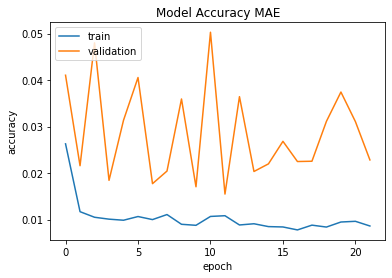

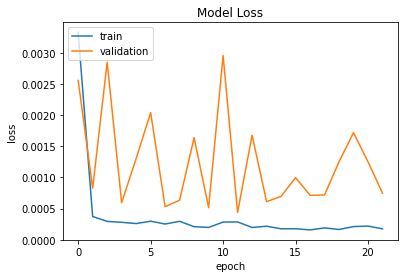

In [ ]:
# List all data in history model
print(history.history.keys())
# Summarize history for MAE accuracy values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Accuracy MAE')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Summarize history for Loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **Step #7B Evaluate Model Performance**

In [ ]:
# Print evaluation metrics for all data sets
train_eval = CNN_model.evaluate(x_train, y_train, verbose=0)
test_eval = CNN_model.evaluate(x_test, y_test, verbose=0)
print(' ')
print('Evaluation metrics')
print('Training Data - Loss: {:.4f}, MAE: {:.4f}'.format(train_eval[0], train_eval[1]))
print('Test Data - Loss: {:.4f}, MAE: {:.4f}'.format(test_eval[0], test_eval[1]))

# Get the predicted values
y_train_pred_scaled = CNN_model.predict(x_train)
# Unscale the predicted values 
y_train_pred = scaler_pred.inverse_transform(y_train_pred_scaled)
y_train_unscaled = scaler_pred.inverse_transform(y_train.reshape(-1, 1))

# Get the predicted values
y_test_pred_scaled = CNN_model.predict(x_test)
# Unscale the predicted values 
y_test_pred = scaler_pred.inverse_transform(y_test_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Percentage Error (MAPE)
TRAIN_MAPE = np.mean((np.abs(np.subtract(y_train_unscaled, y_train_pred)/ y_train_unscaled))) * 100
print(f'TRAIN Mean Absolute Percentage Error (MAPE): {np.round(TRAIN_MAPE, 2)} %')
TEST_MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_test_pred)/ y_test_unscaled))) * 100
print(f'TEST Mean Absolute Percentage Error (MAPE): {np.round(TEST_MAPE, 2)} %')

# Root Mean Square Error (RMSE)
TRAIN_RMSE = np.sqrt( np.mean(y_train_pred - y_train_unscaled)**2 )
print(f'TRAIN Root Mean Square Error (RMSE): {np.round(TRAIN_RMSE, 2)}')
TEST_RMSE = np.sqrt( np.mean(y_test_pred - y_test_unscaled)**2 )
print(f'TEST Root Mean Square Error (RMSE): {np.round(TEST_RMSE, 2)}')

# R2 Score
r2_acc = r2_score(y_test_unscaled, y_test_pred)
print(f'TEST R2 Score: {np.round(r2_acc, 2)}')

 
Evaluation metrics
Training Data - Loss: 0.0003, MAE: 0.0105
Test Data - Loss: 0.0008, MAE: 0.0226
TRAIN Mean Absolute Percentage Error (MAPE): 2.66 %
TEST Mean Absolute Percentage Error (MAPE): 3.31 %
TRAIN Root Mean Square Error (RMSE): 72.26
TEST Root Mean Square Error (RMSE): 203.6
TEST R2 Score: 0.97


# **Step #8B Predict Future Day’s Price**

In [ ]:
x_future = 60
predictions = np.array([])
last = x_test[-1]
print(last)
for i in range(x_future):
  forecast = CNN_model.predict(np.array([last]))
  last = np.concatenate([last[1:], forecast])
  predictions = np.concatenate([predictions, forecast[0]])
predictions = scaler_pred.inverse_transform([predictions])[0]
print(predictions)

[[0.36268939]
 [0.36079545]
 [0.36363636]
 [0.36079545]
 [0.35511364]
 [0.38257576]
 [0.37689394]
 [0.36837121]
 [0.37405303]
 [0.36742424]
 [0.3655303 ]
 [0.38257576]
 [0.39962121]
 [0.40340909]
 [0.39962121]
 [0.39772727]
 [0.38731061]
 [0.37973485]
 [0.3655303 ]
 [0.34943182]
 [0.34753788]
 [0.34090909]
 [0.33901515]
 [0.34564394]
 [0.34564394]
 [0.35511364]
 [0.36079545]
 [0.35606061]
 [0.34753788]
 [0.34564394]
 [0.33996212]
 [0.3342803 ]
 [0.33333333]
 [0.32765152]
 [0.32575758]
 [0.32765152]
 [0.33901515]
 [0.33996212]
 [0.33712121]
 [0.33143939]
 [0.33049242]
 [0.34185606]
 [0.34375   ]
 [0.33996212]
 [0.34185606]
 [0.34090909]
 [0.34375   ]
 [0.33712121]
 [0.35132576]
 [0.34564394]
 [0.34090909]
 [0.3342803 ]
 [0.33049242]
 [0.32954545]
 [0.32954545]
 [0.3342803 ]
 [0.32765152]
 [0.32575758]
 [0.33238636]
 [0.32575758]]
[4178.14200401 4183.94530296 4221.25573158 4224.46265221 4237.39198685
 4275.14427185 4274.0676403  4303.48130226 4303.10616493 4303.36832047
 4305.39034843 43

In [ ]:
dicts = []
forecast_date = stock_market_df.index[-1]
for i in range(x_future):
  forecast_date = curr_date + timedelta(days=1)
  dicts.append({'Predictions':predictions[i], "Date": forecast_date})

future_cnn = pd.DataFrame(dicts).set_index("Date")
future_cnn.to_csv('Result-Predict-CNN-60Days-After.csv')
future_cnn

,Predictions
Date,
2022-03-30,4178.142004
2022-03-30,4183.945303
2022-03-30,4221.255732
2022-03-30,4224.462652
2022-03-30,4237.391987
2022-03-30,4275.144272
2022-03-30,4274.067640
2022-03-30,4303.481302
2022-03-30,4303.106165


In [ ]:
# Create a graph of predictive results
train = stock_market_df[:train_data_length + 1]
test = stock_market_df[train_data_length:]
test['Predictions'] = y_test_pred

trace1 = go.Scatter(
    x = train.index,
    y = train['Close'],
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = test.index,
    y = test['Predictions'],
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = test.index,
    y = test['Close'],
    mode='lines',
    name = 'Ground Truth'
)
trace4 = go.Scatter(
    x = future_cnn.index,
    y = future_cnn['Predictions'],
    mode='lines',
    name = 'Future Price'
)
layout = go.Layout(
    title = "PT Unilever Indonesia TBK Stock",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)
fig.show()

# **Section #3 Univariate Multistep GRU**
# **Step #6C Train the Univariate Prediction Model**

After previously we have carried out steps 1 to 5, then we can immediately retrain with a different model. We can train the GRU for stock market prediction. The architecture of our neural network consists of the following four layers:

*   GRU layer, which takes our mini-batches as input and returns the whole sequence
*   GRU layer that takes the sequence from the previous layer, but only return 1 values
*   Dense layer with 25 neurons
*   Final dense layer that outputs the predicted value

The number of neurons in the first layer must be equal to the size of a minibatch of the input data. Each minibatch in our dataset consists of a matrix with 60 steps and one features. Thus, the input layer of our recurrent neural network consists of 60 neurons.

In [ ]:
# Configure the neural network model
GRU_model = Sequential()

# The number of neurons is determined from the result of x_train.shape[1] multiplied by x_train.shape[2] which means 60 * 1 = 60
N_neurons = x_train.shape[1] * x_train.shape[2]
print(N_neurons, x_train.shape[1], x_train.shape[2])
GRU_model.add(GRU(N_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
GRU_model.add(GRU(N_neurons, return_sequences=False))
GRU_model.add(Dense(25))
GRU_model.add(Dense(1))

# Compile model using loss mse, optimizer adam
# For the optimizer, if you want to use another optimizer option, you can use rmsprop or sgd
GRU_model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae"])
# Summarize the architecture of the model that has been created
GRU_model.summary()

60 60 1
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 60)            11340     
                                                                 
 gru_1 (GRU)                 (None, 60)                21960     
                                                                 
 dense_4 (Dense)             (None, 25)                1525      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 34,851
Trainable params: 34,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model
epochs = 50
batch_size = 16
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='GRU-Stock-Market.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
history = GRU_model.fit(x_train, y_train, callbacks=[es, mcp], validation_split=0.2, batch_size=batch_size, epochs=epochs)

Epoch 1/50
181/181 [==============================] - ETA: 0s - loss: 0.0027 - mae: 0.0193
Epoch 00001: val_loss improved from inf to 0.00028, saving model to GRU-Stock-Market.h5
181/181 [==============================] - 16s 66ms/step - loss: 0.0027 - mae: 0.0193 - val_loss: 2.7702e-04 - val_mae: 0.0123
Epoch 2/50
181/181 [==============================] - ETA: 0s - loss: 9.2618e-05 - mae: 0.0060
Epoch 00002: val_loss did not improve from 0.00028
181/181 [==============================] - 11s 59ms/step - loss: 9.2618e-05 - mae: 0.0060 - val_loss: 3.2032e-04 - val_mae: 0.0140
Epoch 3/50
181/181 [==============================] - ETA: 0s - loss: 9.6705e-05 - mae: 0.0064
Epoch 00003: val_loss did not improve from 0.00028
181/181 [==============================] - 11s 60ms/step - loss: 9.6705e-05 - mae: 0.0064 - val_loss: 3.1859e-04 - val_mae: 0.0142
Epoch 4/50
181/181 [==============================] - ETA: 0s - loss: 8.1015e-05 - mae: 0.0056
Epoch 00004: val_loss improved from 0.00028 t

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


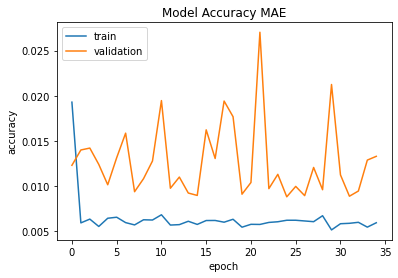

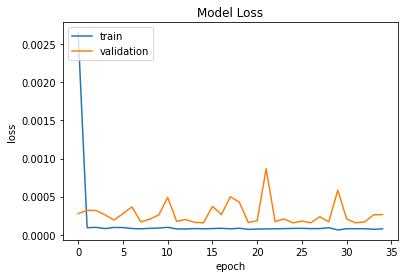

In [ ]:
# List all data in history model
print(history.history.keys())
# Summarize history for MAE accuracy values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Accuracy MAE')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Summarize history for Loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **Step #7C Evaluate Model Performance**

In [ ]:
# Print evaluation metrics for all data sets
train_eval = GRU_model.evaluate(x_train, y_train, verbose=0)
test_eval = GRU_model.evaluate(x_test, y_test, verbose=0)
print(' ')
print('Evaluation metrics')
print('Training Data - Loss: {:.4f}, MAE: {:.4f}'.format(train_eval[0], train_eval[1]))
print('Test Data - Loss: {:.4f}, MAE: {:.4f}'.format(test_eval[0], test_eval[1]))

# Get the predicted values
y_train_pred_scaled = GRU_model.predict(x_train)
# Unscale the predicted values 
y_train_pred = scaler_pred.inverse_transform(y_train_pred_scaled)
y_train_unscaled = scaler_pred.inverse_transform(y_train.reshape(-1, 1))

# Get the predicted values
y_test_pred_scaled = GRU_model.predict(x_test)
# Unscale the predicted values 
y_test_pred = scaler_pred.inverse_transform(y_test_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Percentage Error (MAPE)
TRAIN_MAPE = np.mean((np.abs(np.subtract(y_train_unscaled, y_train_pred)/ y_train_unscaled))) * 100
print(f'TRAIN Mean Absolute Percentage Error (MAPE): {np.round(TRAIN_MAPE, 2)} %')
TEST_MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_test_pred)/ y_test_unscaled))) * 100
print(f'TEST Mean Absolute Percentage Error (MAPE): {np.round(TEST_MAPE, 2)} %')

# Root Mean Square Error (RMSE)
TRAIN_RMSE = np.sqrt( np.mean(y_train_pred - y_train_unscaled)**2 )
print(f'TRAIN Root Mean Square Error (RMSE): {np.round(TRAIN_RMSE, 2)}')
TEST_RMSE = np.sqrt( np.mean(y_test_pred - y_test_unscaled)**2 )
print(f'TEST Root Mean Square Error (RMSE): {np.round(TEST_RMSE, 2)}')

# R2 Score
r2_acc = r2_score(y_test_unscaled, y_test_pred)
print(f'TEST R2 Score: {np.round(r2_acc, 2)}')

 
Evaluation metrics
Training Data - Loss: 0.0001, MAE: 0.0095
Test Data - Loss: 0.0003, MAE: 0.0145
TRAIN Mean Absolute Percentage Error (MAPE): 3.89 %
TEST Mean Absolute Percentage Error (MAPE): 2.15 %
TRAIN Root Mean Square Error (RMSE): 86.3
TEST Root Mean Square Error (RMSE): 123.74
TEST R2 Score: 0.99


In [ ]:
x_future = 60
predictions = np.array([])
last = x_test[-1]
print(last)
for i in range(x_future):
  forecast = GRU_model.predict(np.array([last]))
  last = np.concatenate([last[1:], forecast])
  predictions = np.concatenate([predictions, forecast[0]])
predictions = scaler_pred.inverse_transform([predictions])[0]
print(predictions)

[[0.36268939]
 [0.36079545]
 [0.36363636]
 [0.36079545]
 [0.35511364]
 [0.38257576]
 [0.37689394]
 [0.36837121]
 [0.37405303]
 [0.36742424]
 [0.3655303 ]
 [0.38257576]
 [0.39962121]
 [0.40340909]
 [0.39962121]
 [0.39772727]
 [0.38731061]
 [0.37973485]
 [0.3655303 ]
 [0.34943182]
 [0.34753788]
 [0.34090909]
 [0.33901515]
 [0.34564394]
 [0.34564394]
 [0.35511364]
 [0.36079545]
 [0.35606061]
 [0.34753788]
 [0.34564394]
 [0.33996212]
 [0.3342803 ]
 [0.33333333]
 [0.32765152]
 [0.32575758]
 [0.32765152]
 [0.33901515]
 [0.33996212]
 [0.33712121]
 [0.33143939]
 [0.33049242]
 [0.34185606]
 [0.34375   ]
 [0.33996212]
 [0.34185606]
 [0.34090909]
 [0.34375   ]
 [0.33712121]
 [0.35132576]
 [0.34564394]
 [0.34090909]
 [0.3342803 ]
 [0.33049242]
 [0.32954545]
 [0.32954545]
 [0.3342803 ]
 [0.32765152]
 [0.32575758]
 [0.33238636]
 [0.32575758]]
[4168.9272213  4259.5688343  4345.5489254  4429.99416351 4514.54483032
 4599.82374191 4685.99297523 4773.09375763 4861.143713   4950.15165329
 5040.12166977 51

# **Step #8C Predict Future Day’s Price**

In [ ]:
dicts = []
forecast_date = stock_market_df.index[-1]
for i in range(x_future):
  forecast_date = forecast_date + timedelta(days=1)
  dicts.append({'Predictions':predictions[i], "Date": forecast_date})

future_gru = pd.DataFrame(dicts).set_index("Date")
future_gru.to_csv('Result-Predict-GRU-60Days-After.csv')
future_gru

,Predictions
Date,
2022-01-29,4168.927221
2022-01-30,4259.568834
2022-01-31,4345.548925
2022-02-01,4429.994164
2022-02-02,4514.544830
2022-02-03,4599.823742
2022-02-04,4685.992975
2022-02-05,4773.093758
2022-02-06,4861.143713


In [ ]:
# Create a graph of predictive results
train = stock_market_df[:train_data_length + 1]
test = stock_market_df[train_data_length:]
test['Predictions'] = y_test_pred

trace1 = go.Scatter(
    x = train.index,
    y = train['Close'],
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = test.index,
    y = test['Predictions'],
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = test.index,
    y = test['Close'],
    mode='lines',
    name = 'Ground Truth'
)
trace4 = go.Scatter(
    x = future_gru.index,
    y = future_gru['Predictions'],
    mode='lines',
    name = 'Future Price'
)
layout = go.Layout(
    title = "PT Unilever Indonesia TBK Stock",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)
fig.show()